In [ ]:
#import drive for data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
% pip install idx2numpy

  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-cp37-none-any.whl size=7920 sha256=41b7a38bbc563731624caaa9c3da55a6fe4380564c2622de7987373adb2e0c45
  Stored in directory: /root/.cache/pip/wheels/7a/c1/da/284ce80a748fab898b8d1fa95468a386e7cf3b81da18511f9d
Successfully built idx2numpy


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.layers import Dense,Dropout,Flatten
import pandas
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
import idx2numpy
X_train = idx2numpy.convert_from_file('/content/drive/MyDrive/balancedMNIST/emnist-balanced-train-images-idx3-ubyte')### 60k training images each with 784 pixel elements 
Y_train = idx2numpy.convert_from_file('/content/drive/MyDrive/balancedMNIST/emnist-balanced-train-labels-idx1-ubyte')#### labels--digits for each training image among 60k
X_test=idx2numpy.convert_from_file('/content/drive/MyDrive/balancedMNIST/emnist-balanced-test-images-idx3-ubyte')
Y_test=idx2numpy.convert_from_file('/content/drive/MyDrive/balancedMNIST/emnist-balanced-test-labels-idx1-ubyte')
 
 
print('\ntrain images:',X_train.shape)
print('train labels:',Y_train.shape)
print('test images:',X_test.shape)
print('test labels:',Y_test.shape)


train images: (112800, 28, 28)
train labels: (112800,)
test images: (18800, 28, 28)
test labels: (18800,)


In [ ]:
from keras.applications.vgg16 import VGG16
from keras import models
from keras.layers import Dense,Flatten,Dropout
import cv2
import numpy as np

In [ ]:
x_train=[cv2.cvtColor(cv2.resize(i,(48,48)),cv2.COLOR_GRAY2BGR)for i in X_train]
x_test=[cv2.cvtColor(cv2.resize(i,(48,48)),cv2.COLOR_GRAY2BGR)for i in X_test]

In [ ]:
x_train=np.array(x_train).astype("float32")/255
x_train=x_train.reshape((112800,48,48,3))
x_test=np.array(x_test).astype("float32")/255
x_test=x_test.reshape((18800,48,48,3))

In [ ]:
y_train=np_utils.to_categorical(Y_train)
y_test=np_utils.to_categorical(Y_test)

In [ ]:
#Modeling
conv_base=VGG16(weights='imagenet',
				include_top=False,
				input_shape=(48,48,3))
conv_base.trainable=False
model=models.Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(4096,activation="relu"))
model.add(Dropout(0.5))
# layer 14
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
# layer 15
model.add(Dense(47,activation="softmax"))

#Compile model
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])

#Training model0
model.fit(x_train,y_train,batch_size=64,epochs=5,validation_split=0.33,verbose=1)




58900480/58889256 [==============================] - 1s 0us/step
Epoch 1/5
1181/1181 [==============================] - 2756s 2s/step - loss: 1.6931 - accuracy: 0.5236 - val_loss: 0.7275 - val_accuracy: 0.7659
Epoch 2/5
1181/1181 [==============================] - 2737s 2s/step - loss: 0.8834 - accuracy: 0.7244 - val_loss: 0.7176 - val_accuracy: 0.7658
Epoch 3/5
 262/1181 [=====>........................] - ETA: 25:38 - loss: 0.8889 - accuracy: 0.7324

In [ ]:
X_train=np.ravel(X_train).reshape(112800,-1)
X_test=np.ravel(X_test).reshape(18800,-1)
print(X_train.shape)
print(X_test.shape)

(112800, 784)
(18800, 784)


In [ ]:
 
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(Y_train)
y_1hotTest= np_utils.to_categorical(Y_test)
print(dummy_y.shape)
print(dummy_y)

(112800, 47)
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
def DNN_Model():
   model=Sequential ()
   model.add(Dense(100,input_dim=784, activation='relu'))
   model.add(Dense(47, activation='softmax'))
   model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
   return model
 

In [ ]:
model=DNN_Model()
hit=model.fit(X_train,dummy_y,epochs=10,validation_split=0.33,verbose=1)

Epoch 1/10
2362/2362 [==============================] - 6s 2ms/step - loss: 43.5499 - accuracy: 0.0234 - val_loss: 3.8403 - val_accuracy: 0.0236
Epoch 2/10
2362/2362 [==============================] - 5s 2ms/step - loss: 3.8445 - accuracy: 0.0229 - val_loss: 3.8408 - val_accuracy: 0.0236
Epoch 3/10
2362/2362 [==============================] - 5s 2ms/step - loss: 3.8356 - accuracy: 0.0288 - val_loss: 3.8353 - val_accuracy: 0.0256
Epoch 4/10
2362/2362 [==============================] - 5s 2ms/step - loss: 3.8409 - accuracy: 0.0277 - val_loss: 3.8253 - val_accuracy: 0.0290
Epoch 5/10
2362/2362 [==============================] - 5s 2ms/step - loss: 3.8416 - accuracy: 0.0282 - val_loss: 3.8458 - val_accuracy: 0.0219
Epoch 6/10
2362/2362 [==============================] - 5s 2ms/step - loss: 3.8299 - accuracy: 0.0277 - val_loss: 3.8348 - val_accuracy: 0.0260
Epoch 7/10
2362/2362 [==============================] - 5s 2ms/step - loss: 3.8326 - accuracy: 0.0282 - val_loss: 3.8413 - val_accuracy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


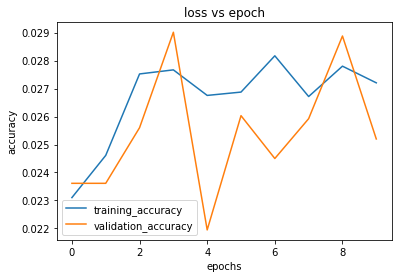

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hit.history['accuracy'])
plt.plot(hit.history['val_accuracy'])
plt.title('loss vs epoch')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['training_accuracy','validation_accuracy'],loc='upper_right')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


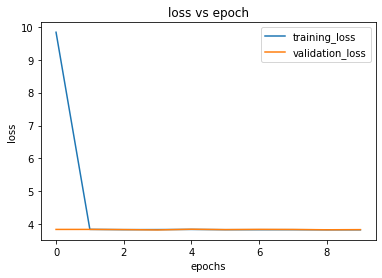

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hit.history['loss'])
plt.plot(hit.history['val_loss'])
plt.title('loss vs epoch')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['training_loss','validation_loss'],loc='upper_right')
plt.show()

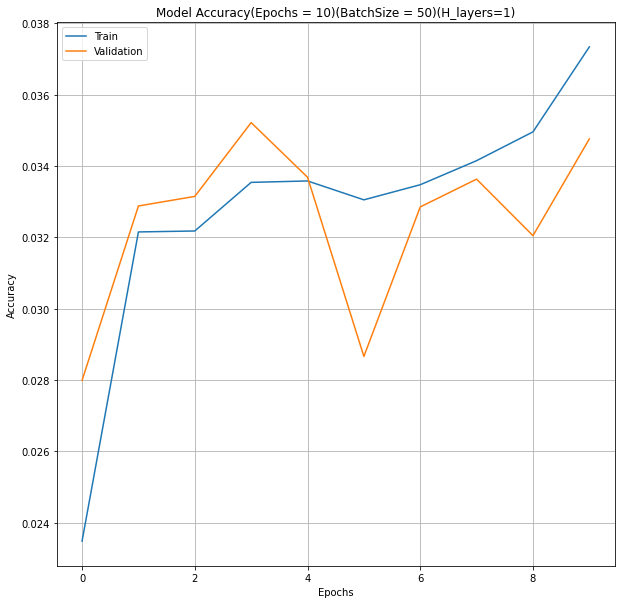

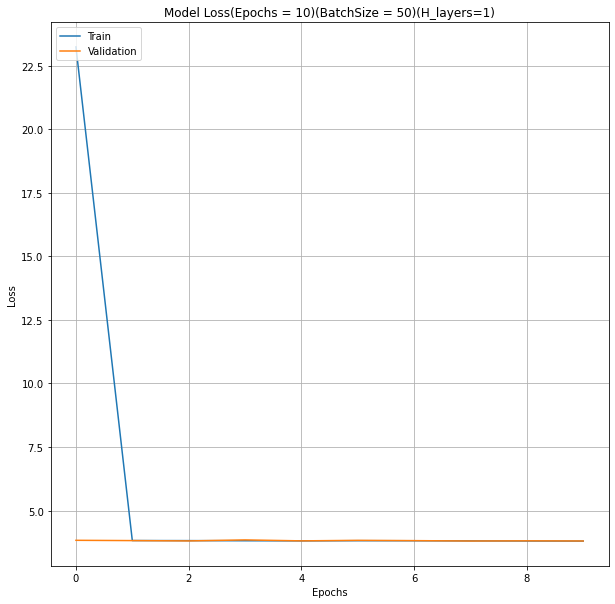

0.03611702099442482 %


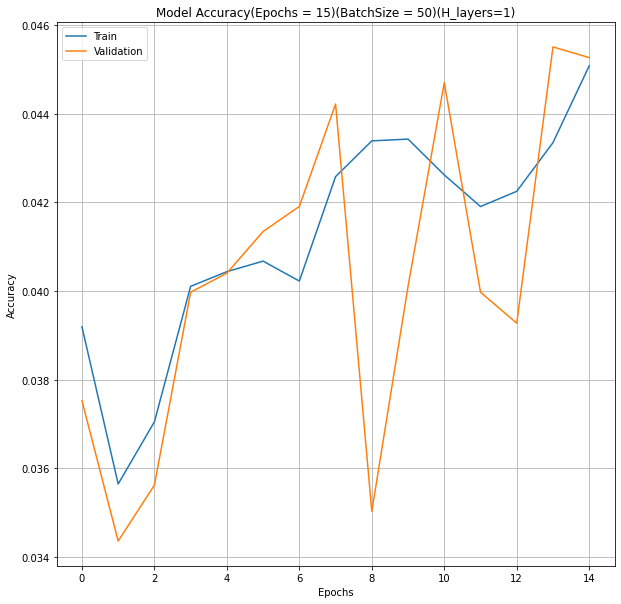

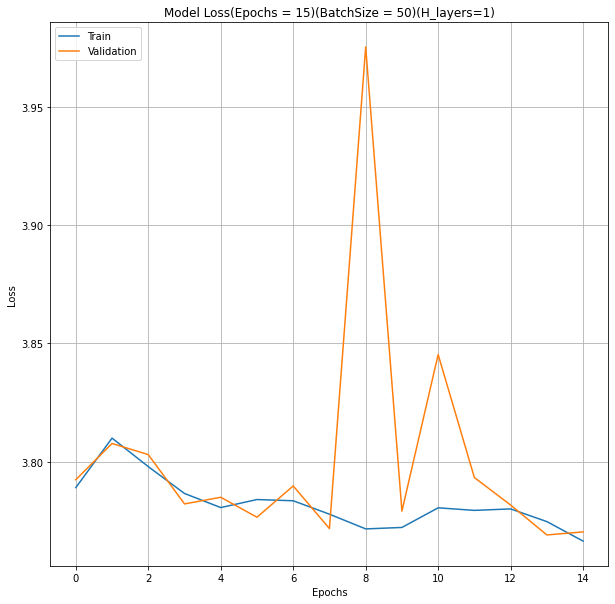

0.04510638117790222 %


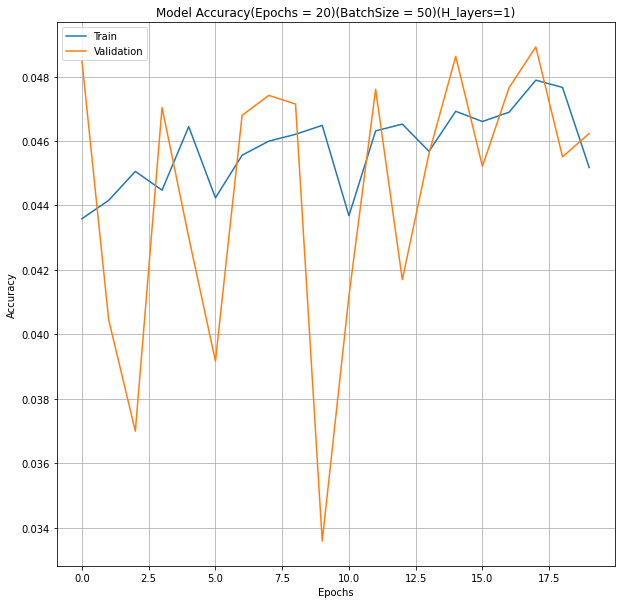

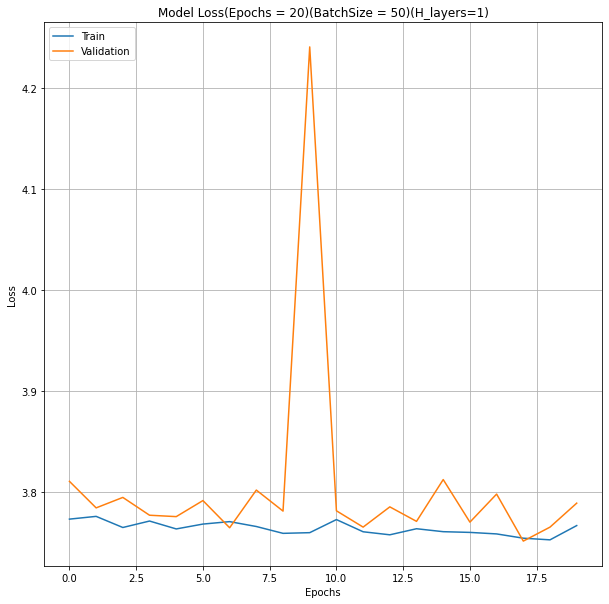

0.04643617197871208 %


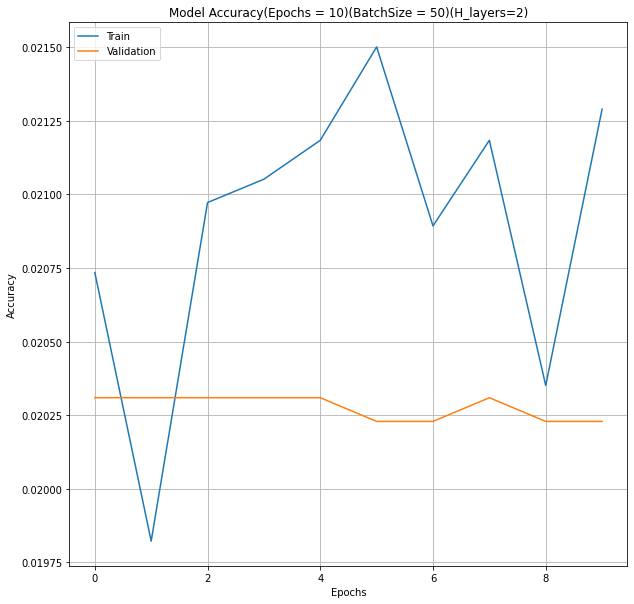

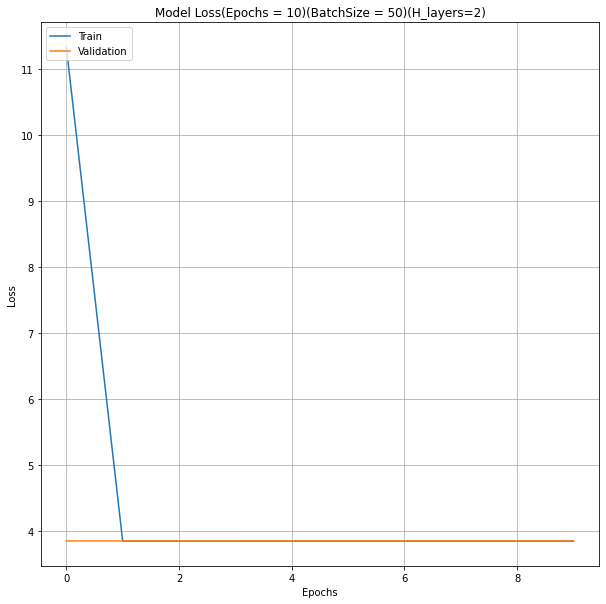

0.021276595070958138 %


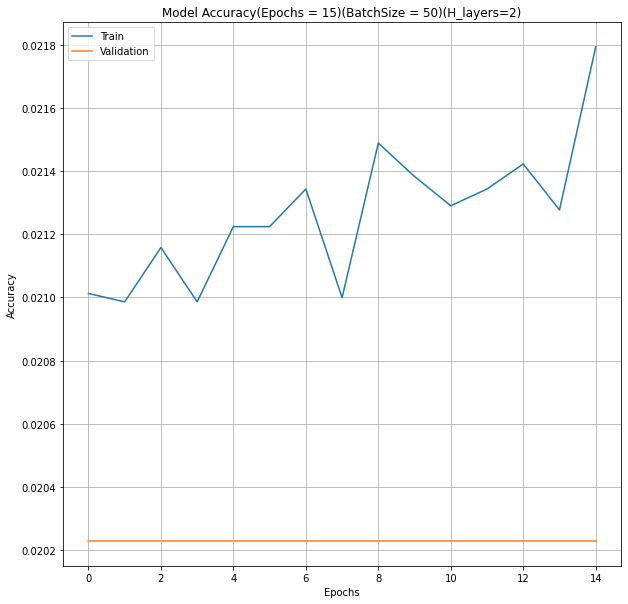

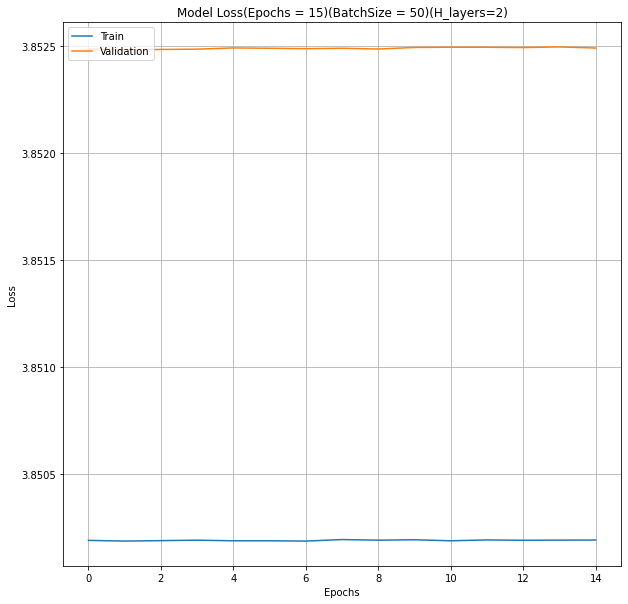

0.021276595070958138 %


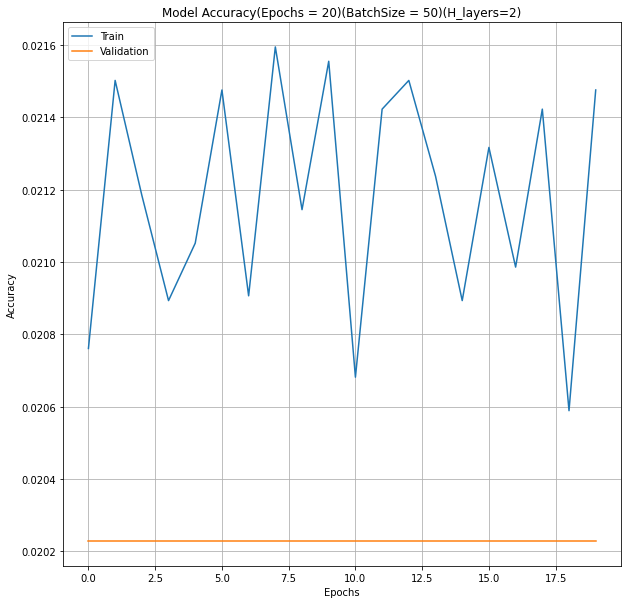

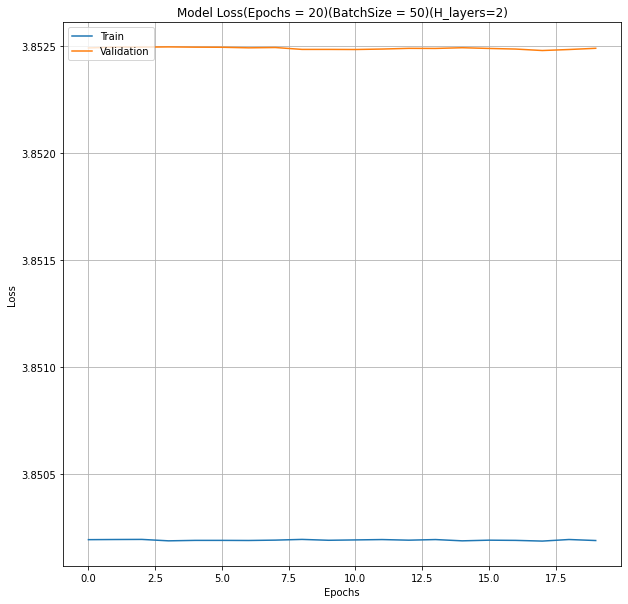

0.021276595070958138 %


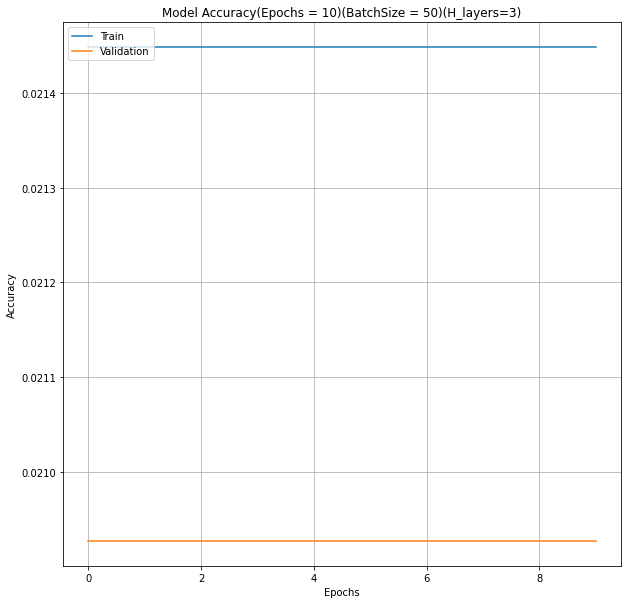

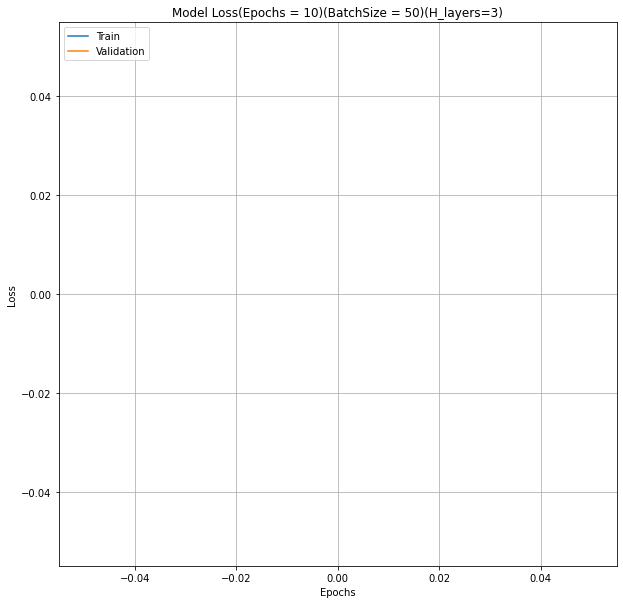

0.021276595070958138 %


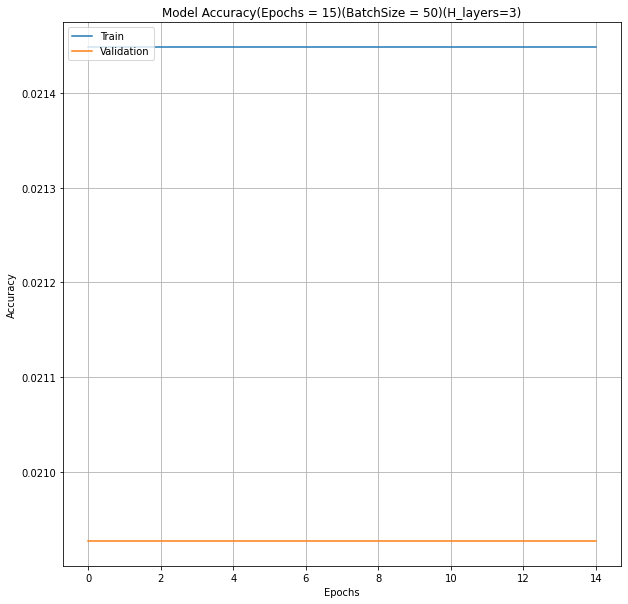

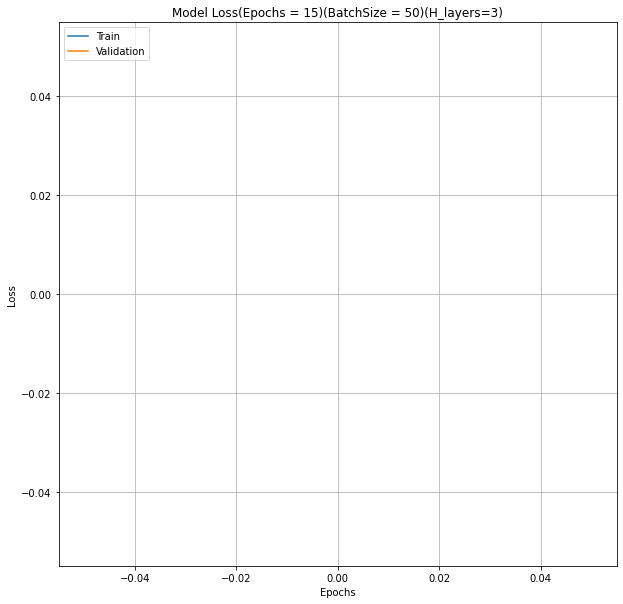

0.021276595070958138 %


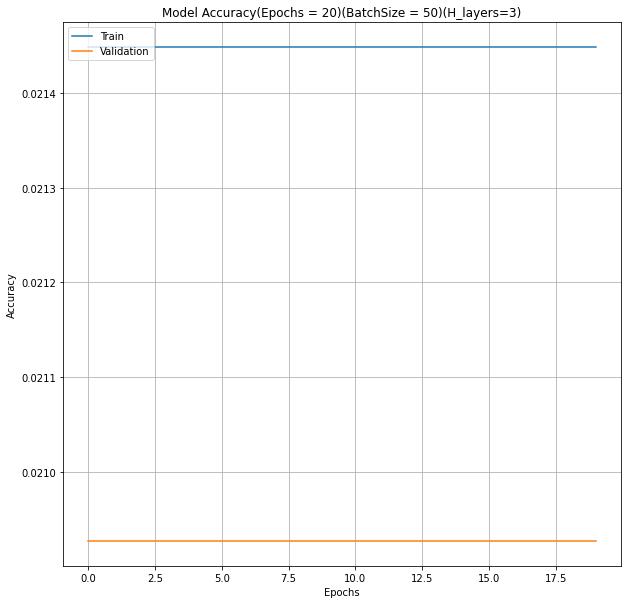

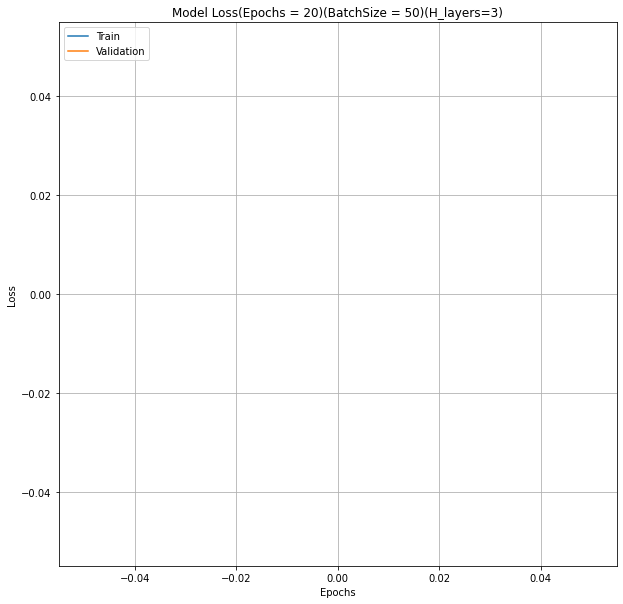

0.021276595070958138 %


In [ ]:

files_dir = '/content/drive/MyDrive/PRML_History/'
layers=[1,2,3]
nodes=[200,100,50]
for k in layers:
      def DNN_Model():
          model=Sequential()
          model.add(Dense(100,input_dim=784, activation='relu'))
   
          for i in range(1,k):
              model.add(Dense(nodes[i-1], activation='relu'))

          model.add(Dense(47, activation='softmax'))
          model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
          return model

      model=DNN_Model()
     # model.fit(X_train,dummy_y,validation_split=0.33,epochs=10,batch_size=50, verbose=0)
       
      epoch_range = np.array([10,15,20])
      batch_range=[50]
      for b in batch_range:
          for e in epoch_range:

              Details = model.fit(X_train,dummy_y,validation_split=0.33, epochs=e, batch_size=b,verbose=0)
  #Details = OneHiddenNN_Model.fit(X,dummy_y,validation_split=0.33, epochs=e, batch_size=b)#, verbose=1)### both train images(pixels) and corresponding labels(1-hot) are in encoded form
  #estimator = KerasClassifier(build_fn=baseline_model, epochs=70, batch_size=5, verbose=0)
  #kfold = KFold(n_splits=10, shuffle=True)
  #results = cross_val_score(estimator, X, dummy_y, cv=kfold)
  #print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
 
             
 
  # summarize history for accuracy
              plt.figure(figsize=(10,10))
              plt.plot(Details.history['accuracy'])
              plt.plot(Details.history['val_accuracy'])
              title = 'Model Accuracy'+'(Epochs = '+str(e)+')'+'(BatchSize = '+str(b)+')'+'(H_layers='+str(k)+')'
              plt.title(title)
              plt.ylabel('Accuracy')
              plt.xlabel('Epochs')
              plt.grid()
              plt.legend(['Train', 'Validation'], loc='upper left')
              file_name = files_dir+'Acc_'+str(e)+'_'+str(b)+'_'+'H_layers_'+str(k)
              plt.savefig(file_name)
              plt.show()
 
  # summarize history for loss
              plt.figure(figsize=(10,10))
              plt.plot(Details.history['loss'])
              plt.plot(Details.history['val_loss'])
              title = 'Model Loss'+'(Epochs = '+str(e)+')'+'(BatchSize = '+str(b)+')'+'(H_layers='+str(k)+')'
              plt.title(title)
              plt.ylabel('Loss')
              plt.xlabel('Epochs')
              plt.grid()
              plt.legend(['Train', 'Validation'], loc='upper left')
              file_name = files_dir+'Loss_'+str(e)+'_'+str(b)+'_'+'H_layers_'+str(k)
              plt.savefig(file_name)
              plt.show()
 
             # test_perf = []
              #TestImage =TestImageSet[:,0:784]
  ##TestImage = np.asarray(TestImage).astype('float32')
              #print(TestImage.shape)
              #y_pred = OneHiddenNN_Model.predict_classes(TestImage)
              #test_accuracy = (18800 - np.count_nonzero(TestImageSet[:,784]-y_pred))*100/18800
             # test_perf.append(test_accuracy)
              test_accuracy=model.evaluate(X_test,y_1hotTest,verbose=0)

              hist_df = pandas.DataFrame(Details.history)
              hist_csv_file = files_dir+'history_'+str(e)+'_'+str(b)+'_'+str(k)+'_'+str(test_accuracy[1])+'.csv'
              with open(hist_csv_file, mode='w') as f:
                    hist_df.to_csv(f)

              print(test_accuracy[1],'%')

In [ ]:
 def DNN_Model():
          model=Sequential()
          model.add(Dense(100,input_dim=784, activation='relu'))
   
          for i in range(1,k):
              model.add(Dense(nodes[i-1], activation='relu'))

          model.add(Dense(47, activation='softmax'))
          model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
          return model

In [ ]:
 model=DNN_Model()
 model.fit(X_train,dummy_y,epochs=10,validation_split=0.33,verbose=1)